Case Avançado - Felipe da Silva Melo - 11771471

Wall-E é um robô compactador, deixado na Terra após a fuga dos humanos graças à grande quantidade de lixo acumulado no planeta. Durante sua rotina de compactar todo o lixo que encontra e empilha-lo, um dia Wall-E encontra outra robô, muito mais tecnológica, chamada EVA, que descobrimos ser da Axiom, uma nave gigantesca tripulada por toda a população humana mas que está ficando pequena para suportar a superpopulação para qual estão se encaminhando. Acompanhamos essa jornada incrível com ambos os personagens, tentando entender se a Terra já está "saudável" o suficiente para abrigar vida novamente.

In [2]:
# Importando as bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import requests
import csv

C:\Users\felip\AppData\Local\Temp\ipykernel_26656\2091719747.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Contextualização

Para ajudar Wall-E com sua missão de compactar o lixo do planeta, precisamos entender melhor sobre ele, por isso ele baixou um arquivo .csv com algumas informações sobre o lixo.

Descrição das Colunas do DataFrame:

dropoff_site: Local onde o lixo será descartado

load_id: O número de identificação do carregamento

load_time: Horário de carregamento

load_type: Tipo de carregamento (ou de lixo)

load_weight: Peso do carregamento de lixo

report_date: Data do relatório

route_number: Número de identificação da rota

route_type: Tipo de rota

Questão 1

a) Leia o arquivo "Wall-E.csv" com nosso banco de dados, e o transforme em um Data Frame do Pandas.

In [3]:
# Lê o arquivo csv de um diretorio no pc
path_walle = 'C:/Users/felip/OneDrive/Documentos/Projetos Python/Notebooks/FeaDev2024/data/Wall-E.csv'
df_walle = pd.read_csv(path_walle)
df_walle

,dropoff_site,load_id,load_time,load_type,load_weight,report_date,route_number,route_type
0,MRF,328118,2009-05-27 12:55:00,RECYCLING - SINGLE STREAM,4060.0,2009-05-27,DW1,RECYCLING - SINGLE STREAM
1,BRAKER SITE,308336,2008-12-16 10:55:00,SWEEPING,NaN,2008-12-16,NW10-R,STREET CLEANING-RESIDENTIAL
2,TDS - MRF,541514,2012-09-06 13:56:00,RECYCLING - SINGLE STREAM,5060.0,2012-09-06,RHBU20,RECYCLING - SINGLE STREAM
3,TDS LANDFILL,689059,2016-03-14 07:56:00,SWEEPING,3720.0,2016-03-14,DSS04,SWEEPER DUMPSITES
4,HORNSBY BEND,108272,2004-12-02 15:29:00,YARD TRIMMING,13840.0,2004-12-02,YH08,YARD TRIMMINGS
...,...,...,...,...,...,...,...,...
564398,TDS - MRF,619855,2014-07-22 13:34:00,RECYCLING - SINGLE STREAM,20020.0,2014-07-22,RTBS43,RECYCLING - SINGLE STREAM
564399,TDS LANDFILL,265305,2008-02-13 11:15:00,GARBAGE COLLECTIONS,9160.0,2008-02-13,PW83,GARBAGE COLLECTION
564400,MRF,240187,2007-08-23 14:18:00,RECYCLING - COMINGLE,2820.0,2007-08-23,RH10,RECYCLING
564401,MRF,353867,2010-01-12 11:39:00,RECYCLING - SINGLE STREAM,13320.0,2010-01-12,RTBS35,RECYCLING - SINGLE STREAM


b) Com o Data Frame em mãos precisamos mexer um pouco nele: Transforme a coluna report_date em DateTime (com o comando do Pandas!)

In [4]:
# transformando a coluna report_date em um datetime
df_walle['report_date'] = pd.to_datetime(df_walle['report_date'])
df_walle

,dropoff_site,load_id,load_time,load_type,load_weight,report_date,route_number,route_type
0,MRF,328118,2009-05-27 12:55:00,RECYCLING - SINGLE STREAM,4060.0,2009-05-27,DW1,RECYCLING - SINGLE STREAM
1,BRAKER SITE,308336,2008-12-16 10:55:00,SWEEPING,NaN,2008-12-16,NW10-R,STREET CLEANING-RESIDENTIAL
2,TDS - MRF,541514,2012-09-06 13:56:00,RECYCLING - SINGLE STREAM,5060.0,2012-09-06,RHBU20,RECYCLING - SINGLE STREAM
3,TDS LANDFILL,689059,2016-03-14 07:56:00,SWEEPING,3720.0,2016-03-14,DSS04,SWEEPER DUMPSITES
4,HORNSBY BEND,108272,2004-12-02 15:29:00,YARD TRIMMING,13840.0,2004-12-02,YH08,YARD TRIMMINGS
...,...,...,...,...,...,...,...,...
564398,TDS - MRF,619855,2014-07-22 13:34:00,RECYCLING - SINGLE STREAM,20020.0,2014-07-22,RTBS43,RECYCLING - SINGLE STREAM
564399,TDS LANDFILL,265305,2008-02-13 11:15:00,GARBAGE COLLECTIONS,9160.0,2008-02-13,PW83,GARBAGE COLLECTION
564400,MRF,240187,2007-08-23 14:18:00,RECYCLING - COMINGLE,2820.0,2007-08-23,RH10,RECYCLING
564401,MRF,353867,2010-01-12 11:39:00,RECYCLING - SINGLE STREAM,13320.0,2010-01-12,RTBS35,RECYCLING - SINGLE STREAM


c) Agora precisamos limpar o data frame: retire as linhas que não tenham o peso do carregamento (load_weight), ou seja, aquelas com valor Na, e as últimas 2 colunas, que não usaremos. Lembre-se de resetar o índice do data frame após isso!

In [5]:
# Exclui linhas em que load_weight tiver missing values
df_walle = df_walle.dropna(subset=['load_weight'])

# Retira as duas ultimas colunas do df
df_walle = df_walle.iloc[:,0:6]
df_walle = df_walle.reset_index()
df_walle

,index,dropoff_site,load_id,load_time,load_type,load_weight,report_date
0,0,MRF,328118,2009-05-27 12:55:00,RECYCLING - SINGLE STREAM,4060.0,2009-05-27
1,2,TDS - MRF,541514,2012-09-06 13:56:00,RECYCLING - SINGLE STREAM,5060.0,2012-09-06
2,3,TDS LANDFILL,689059,2016-03-14 07:56:00,SWEEPING,3720.0,2016-03-14
3,4,HORNSBY BEND,108272,2004-12-02 15:29:00,YARD TRIMMING,13840.0,2004-12-02
4,5,MRF,238174,2007-08-02 15:58:00,RECYCLING - COMINGLE,2180.0,2007-08-02
...,...,...,...,...,...,...,...
504962,564398,TDS - MRF,619855,2014-07-22 13:34:00,RECYCLING - SINGLE STREAM,20020.0,2014-07-22
504963,564399,TDS LANDFILL,265305,2008-02-13 11:15:00,GARBAGE COLLECTIONS,9160.0,2008-02-13
504964,564400,MRF,240187,2007-08-23 14:18:00,RECYCLING - COMINGLE,2820.0,2007-08-23
504965,564401,MRF,353867,2010-01-12 11:39:00,RECYCLING - SINGLE STREAM,13320.0,2010-01-12


Questão 2

Podemos retirar algumas informações importantes do dataframe relacionados aos diferentes tipos de lixo e seus descartes, para otimizar o trabalho de Wall-E e saber quanto trabalho já foi feito na Terra.

a) Agora que você já descartou os dados sujos do dataframe, conte quantos lixos temos de cada tipo na base de dados.

In [6]:
# Agrupa por load_type e soma load_weight de cada load_type
count = df_walle.groupby('load_type')['load_weight'].sum()
count

load_type
BAGGED LITTER                  5.433810e+05
BRUSH                          1.852261e+08
BULK                           2.258559e+08
DEAD ANIMAL                    2.850180e+06
GARBAGE COLLECTIONS            3.374874e+09
LITTER                         4.554790e+06
MATTRESS                       1.898000e+04
MIXED LITTER                   5.039105e+06
MULCH                          1.071057e+07
RECYCLED METAL                 1.931708e+06
RECYCLING - COMINGLE           1.015149e+08
RECYCLING - PAPER              1.416616e+08
RECYCLING - PLASTIC BAGS       7.767000e+03
RECYCLING - SINGLE STREAM      9.842396e+08
SWEEPING                       1.581400e+08
TIRES                          5.049862e+06
YARD TRIMMING                  6.448736e+08
YARD TRIMMING - X-MAS TREES    1.463600e+05
Name: load_weight, dtype: float64

b) Calcule o peso médio do quanto foi descartado de cada tipo de lixo.

In [7]:
# Agrupa pela coluna load_type e calcula a média da coluna load_weight
mean = df_walle.groupby('load_type')['load_weight'].mean()
mean

load_type
BAGGED LITTER                  12937.642857
BRUSH                           5847.707561
BULK                            7292.024990
DEAD ANIMAL                      528.006669
GARBAGE COLLECTIONS            17005.311121
LITTER                          3795.658333
MATTRESS                        4745.000000
MIXED LITTER                    4110.199837
MULCH                           7969.176339
RECYCLED METAL                  3004.211509
RECYCLING - COMINGLE            3262.465580
RECYCLING - PAPER               4405.586067
RECYCLING - PLASTIC BAGS         194.175000
RECYCLING - SINGLE STREAM       9894.340910
SWEEPING                       11999.395781
TIRES                           2180.424007
YARD TRIMMING                  11575.960831
YARD TRIMMING - X-MAS TREES    11258.461538
Name: load_weight, dtype: float64

Questão 3

Faça um gráfico da evolução do peso médio anual ao longo do tempo (usando matplot, seaborn ou plotly)

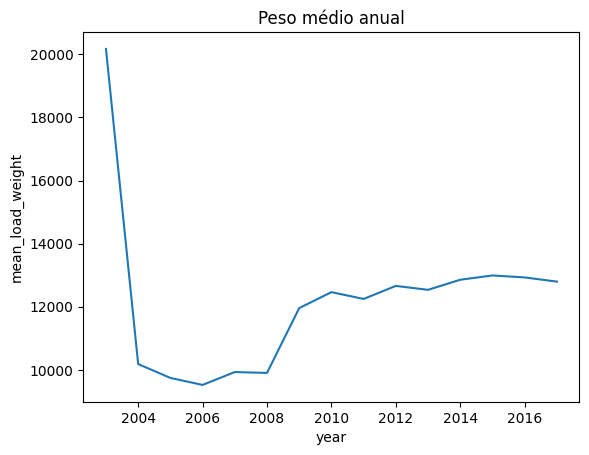

In [8]:
# Trata o df para maior facilidade de criação do gráfico
df_walle['report_year'] = df_walle['report_date'].dt.year
df_walle = df_walle.sort_values(by='report_year') # ordena pela coluna report_year
df2_walle = df_walle.groupby('report_year')['load_weight'].mean() # agrupa pela coluna report_year e calcula a media de load_weight
df2_walle = df2_walle.reset_index()
df2_walle.columns = ['report_year', 'mean_load_weight']
df2_walle

# Cria gráfico usando matplotlib
plt.plot(df2_walle['report_year'], df2_walle['mean_load_weight'])
plt.xlabel('year')
plt.ylabel('mean_load_weight')
plt.title('Peso médio anual')
plt.show()

Contextualização
Que o planeta não suporta todo o lixo que a humanidade é capaz de produzir, isso é fato. Sabemos também que a população mundial cresce a cada dia, e com ela, a produção de lixo. Nesse sentido, faz-se necessário acompanhar e prever o crescimento populacional de forma a identificar quanto tempo ainda temos para salvar a Terra e evitar que cheguemos ao apocalipse igual ao presenciado pelo Wall-E.

Para tanto, vamos ajudar EVA a enfrentar seus problemas na Axiom, trabalhando com uma base de dados contendo informações sobre a população mundial, e buscaremos fazer análises que nos apresentem insights sobre o futuro do nosso planeta. As colunas com as quais trabalharemos são:

country: nome do país

rank: posição do país em termos de população (em 2023)

area: área total do país em quilômetros quadrados

landAreaKm: área terrestre do país em quilômetros quadrados

cca2: código de dois caracteres do país

cca3: código de três caracteres do país

netChange: variação líquida da população (%)

growthRate: taxa de crescimento da população (%)

worldPercentage: percentual da população mundial do país (em 2023)

density: densidade populacional por quilômetro quadrado (em 2023)

densityMi: densidade populacional por milha quadrada

place: número representativo associado ao país

pop1980: população do país em 1980

pop2000: população do país em 2000

pop2010: população do país em 2010

pop2022: população do país em 2022

pop2023: população do país em 2023

pop2030: população do país em 2030

pop2050: população do país em 2050

Questão 4

a) Inicialmente, leia o arquivo "EVA.csv" com nosso banco de dados, e o transforme em um Data Frame do Pandas.

In [9]:
# lê o arquivo de um diretorio no pc
path_eva = 'C:/Users/felip/OneDrive/Documentos/Projetos Python/Notebooks/FeaDev2024/data/EVA.csv'
df_eva = pd.read_csv(path_eva)
df_eva

,country,rank,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
0,India,1,3287590.00,2973190.00,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,356,696828385,1059633675,1240613620,1417173173,1428627663,1514994080,1670490596
1,China,2,9706961.00,9424702.90,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,156,982372466,1264099069,1348191368,1425887337,1425671352,1415605906,1312636325
2,United States,3,9372610.00,9147420.00,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,840,223140018,282398554,311182845,338289857,339996563,352162301,375391963
3,Indonesia,4,1904569.00,1877519.00,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,360,148177096,214072421,244016173,275501339,277534122,292150100,317225213
4,Pakistan,5,881912.00,770880.00,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,586,80624057,154369924,194454498,235824862,240485658,274029836,367808468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Montserrat,230,102.00,102.00,MS,MSR,NaN,-0.0009,NaN,43.0000,111.3700,500,11452,5138,4938,4390,4386,4301,3781
230,Falkland Islands,231,12173.00,12173.00,FK,FLK,NaN,0.0029,NaN,0.3114,0.8066,238,2240,3080,3187,3780,3791,3869,3779
231,Niue,232,261.00,261.00,NU,NIU,0.0000,0.0005,NaN,7.4138,19.2017,570,3637,2074,1812,1934,1935,1948,2096
232,Tokelau,233,12.00,10.00,TK,TKL,NaN,0.0118,NaN,189.3000,490.2870,772,1647,1666,1367,1871,1893,2046,2430


b) Agora, apresente os cinco países que mais crescem durante o período estudado. Para isso, utilize como base a coluna growthRate. Dê a taxa, os nomes e em que rank estão os países.

In [10]:
# Cria df com growthRate, rank e country dos paises que mais crescem
df_eva_sort = df_eva.sort_values(by='growthRate', ascending=False) # ordena do maior para o maior na coluna growthrate
df_eva_sort = df_eva_sort[['growthRate', 'rank', 'country']].head() # escolhe os 5 paises que mais crescem e as colunas de interesse
df_eva_sort

,growthRate,rank,country
59,0.0498,60,Syria
133,0.0498,134,Moldova
53,0.0380,54,Niger
14,0.0329,15,DR Congo
66,0.0313,67,Chad


c) Por fim, apresente os cinco países menos densos. Dê sua densidade, seu nome, sua área de terra e sua população total em 2023.

In [11]:
# cria df com density, country, area e pop2023 dos países menos densos
df_eva_sort2 = df_eva.sort_values(by='density') # ordena do menor para o maior pela coluna density
df_eva_sort2 = df_eva_sort2[['density', 'country', 'area', 'pop2023']].head() # seleciona os 5 países menos densos e as colunas de interesse
df_eva_sort2

,density,country,area,pop2023
207,0.1380,Greenland,2166086.0,56643
230,0.3114,Falkland Islands,12173.0,3791
171,2.2077,Western Sahara,266000.0,587259
132,2.2133,Mongolia,1564110.0,3447157
144,3.1631,Namibia,825615.0,2604172


Questão 5

a) A partir dos dados da população mundial projetada para 2030, crie um gráfico de pizza com a porcentagem de cada país. Agrupe todos os países com menos de 1% da população mundial na classe "Outros".

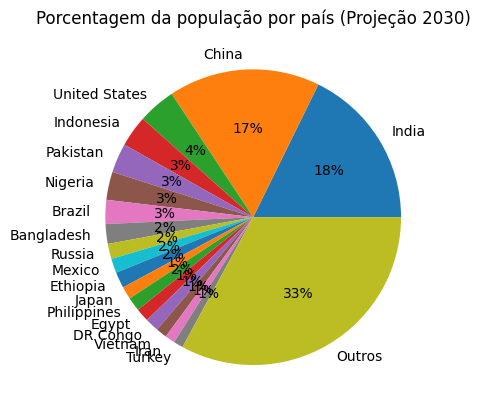

,country,pop2030,porcentagem
0,India,1514994080,17.730806
1,China,1415605906,16.567611
2,United States,352162301,4.121548
3,Indonesia,292150100,3.419193
4,Pakistan,274029836,3.207121
5,Nigeria,262580426,3.073123
6,Brazil,223908968,2.620529
7,Bangladesh,184424144,2.158417
8,Russia,141432741,1.655265
9,Mexico,134534107,1.574526


In [12]:
# Cria o dataframe para que o gráfico possa ser feito, output é o df_pop2030
df_pop2030 = df_eva[['country', 'pop2030']]
total_pop = df_pop2030['pop2030'].sum()
df_pop2030_copy = df_pop2030.copy()
df_pop2030_copy.loc[:, 'porcentagem'] = (df_pop2030_copy['pop2030'] / total_pop) * 100

outros = df_pop2030_copy[df_pop2030_copy['porcentagem'] <= 1]
outros_pop = outros['pop2030'].sum()
outros_tot = outros['porcentagem'].sum()
df_pop2030_copy = df_pop2030_copy[df_pop2030_copy['porcentagem'] >=1 ]
outros_tot_df = pd.DataFrame({}, index=['outros'])
outros_tot_df['pop2030'] = outros_pop
outros_tot_df['porcentagem'] = outros_tot
df_pop2030 = pd.concat([df_pop2030_copy, outros_tot_df], ignore_index=True)
df_pop2030.iloc[-1,0] = 'Outros'

# Grafico
plt.pie(df_pop2030['porcentagem'], labels=df_pop2030['country'], autopct='%0.0f%%')
plt.title('Porcentagem da população por país (Projeção 2030)')
plt.show()
df_pop2030

b) A partir das projeções das populações mundiais, calcule a taxa anual de variação entre os anos de 2023 e 2030 e, em seguida, entre 2030 e 2050. Apresente esses valores em box plots e contraste as diferenças de distribuição de dados. Interprete os resultados. (Tenha em mente perguntas como: as médias variaram? Os quantis indicam que mais países tem valores menos ou maiores de crescimento? O mundo está crescendo mais rápido ou menos rápido ao aproximar-se da metade do século?)

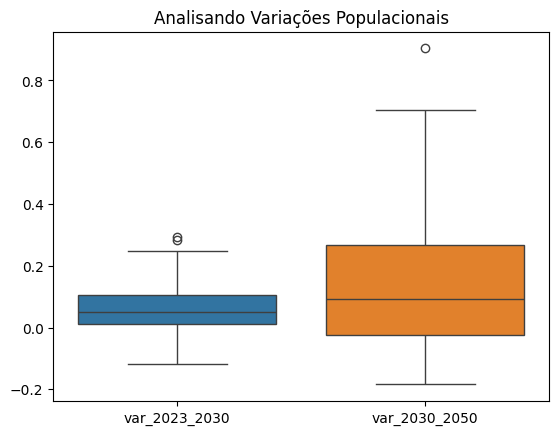

In [13]:
# cria um subdataframe e cria colunas de variaçoes
df_var1 = df_eva[['country', 'pop2023', 'pop2030', 'pop2050']] # seleciona colunas
df_var1_copy = df_var1.copy() # cria uma copia
df_var1_copy['var_2023_2030'] = df_var1_copy['pop2030'] / df_var1_copy['pop2023'] - 1 # calculo para variação de 2023 para 2030
df_var1_copy['var_2030_2050'] = df_var1_copy['pop2050'] / df_var1_copy['pop2030'] - 1 # calculo para variação de 2030 para 2050
df_var1 = df_var1_copy

# Gráfico
sns.boxplot(data=df_var1[['var_2023_2030', 'var_2030_2050']])
plt.title('Analisando Variações Populacionais')
plt.show()


Intepretação: Podemos ver que o 1° quartil apresentou uma leve reduzida, enquanto o 3° quartil aumentou consideralmente de um boxplot para o outro. Antes 75% dos países apresentavam crescimento até cerca de 0.1%, agora 75% dos países apresentam crescimento até cerca 0.22%. Ou seja, mais paises apresentam taxas maiores de crescimento
Pela mediana anterior, vimos que pelo menos 50% dos países tinham crescimento maior que cerca de 0.03%, no segundo boxplot 50% apresentam crescimento pelo menos superior a cerca de 0.1%
O limite superior apresentou grande variação, antes estava em cerca de 0.22%, alcançando cerca de 0.7% no segundo boxplot. Dando mais um indício de que mais países apresentam maiores taxas de crescimento quando chegarmos perto da metade do século.
Ademais, podemos perceber que a amplitude (diferença entre 3° quartil e 1° quartil) aumentou consideralmente, mas com mais países apresentando variação superior a mediana (cerca de 0.1%)

Em suma, os dados de variação da população entre 2050 e 2030 apresentam maior amplitude de dados do que a variação da população entre 2030 e 2023, Porém ao analisar os quartis, mediana e limite superior, podemos acreditar que a taxa de crescimento da maioria dos países tende a acelerar ao chegar perto da metade do século

c) O principal objetivo desse exercício é trabalhar com a ideia de unir dataframes distintos e vasculhar possíveis problemas. Além disso, apresentamos uma forma de visualização bastante útil para alguns casos, que é o emprego de mapas.
Nós já deixamos parte do código abaixo, com comentários do que ele faz. A partir do que lhe é fornecido, faça a união do dataframe contendo a informação dos limites de cada país no mapa com o seus dados de taxa de crescimento entre 2023-2030. Em seguida, plote um mapa com essas taxas em alguma escala de cor (busque os colormaps do pacote de Matplotlib. Eles podem ser bem úteis aqui).

In [14]:
import geopandas as gpd
import numpy as np

# Aciona arquivo com limites espaciais dos países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['name'] = world['name'].str.replace('United States', 'United States of America')
world['name'] = world['name'].str.replace('Dominican Republic', 'Dominican Rep.')

# O formato do arquivo é Geopandas, que, como o nome sugere,
# lembra muito o Pandas, organizando os dados em formato de tabela

# A principal diferença é a presença de uma coluna chamada "geometry"
# Ela contém as coordenadas geoógraficas, ou seja, onde a informação está em um mapa.

# Você pode usar as mesmas funções que usaria em um DataFrame em um GeoDataFrame
# Analise as primeiras linhas e colunas do geodataframe que criamos ('world')
world.head()

C:\Users\felip\AppData\Local\Temp\ipykernel_26656\2740087236.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [15]:
world = world.sort_values(by='pop_est', ascending=False)
world
#df_var1_copy
#df_final = df_var1_copy.merge(world, left_index=True, right_index=True)
#df_final

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
139,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
98,1.366418e+09,Asia,India,IND,2868929,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."
4,3.282395e+08,North America,United States of America of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
8,2.706256e+08,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
102,2.165653e+08,Asia,Pakistan,PAK,278221,"POLYGON ((77.83745 35.49401, 76.87172 34.65354..."
...,...,...,...,...,...,...
134,2.878000e+05,Oceania,New Caledonia,NCL,10770,"POLYGON ((165.77999 -21.08000, 166.59999 -21.7..."
22,5.622500e+04,North America,Greenland,GRL,3051,"POLYGON ((-46.76379 82.62796, -43.40644 83.225..."
159,4.490000e+03,Antarctica,Antarctica,ATA,898,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."
20,3.398000e+03,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."


Questão Bônus

a) Crie um novo DataFrame com 2 colunas: o Ano e a População Mundial daquele ano (ou seja, a soma de todas as populações dos países).

In [16]:
# Obs: Acho que não entendi exatamente oque foi pedido aqui, mas segui o caminho de criar o df abaixo
pop2023 = df_var1['pop2023'].sum()
pop2030 = df_var1['pop2030'].sum()
pop2050 = df_var1['pop2050'].sum()
df_pop = {'2023': [pop2023], '2030': [pop2030], '2050': [pop2050]}
df_pop = pd.DataFrame(df_pop).T
df_pop.columns = ['População Mundial']
df_pop

,População Mundial
2023,8043615390
2030,8544417648
2050,9707789237


b) Faça um gráfico de dispersão da população mundial (com as cores do arco-íris de acordo com o ano) e ajuste uma reta de regressão no gráfico.

<Axes: >

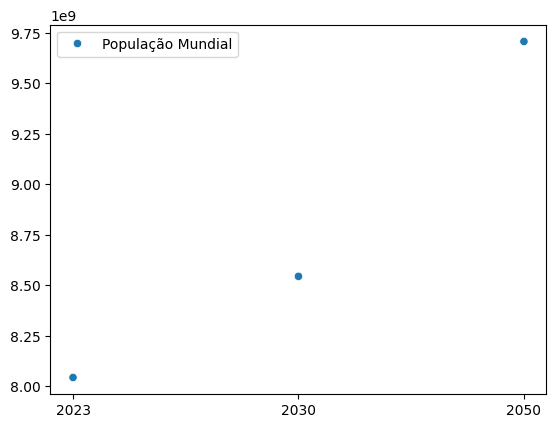

In [17]:
# Gráfico de dispersão usando seaborn
sns.scatterplot(df_pop)